# Νευρωνικά Δίκτυα
# Εργαστηριακή Άσκηση 1: ΜΕΡΟΣ 1 - UCI Dataset

### **ΟΜΑΔΑ 40**
*   Μαριαλένα Βαγγελάτου (03118141)
*   Νικόλαος Μπλέτσας (03118899)
*   Γεώργιος Τζουμανέκας (03118095)


## Εισαγωγή και επισκόπηση

**Περιγραφή**:
Το dataset πρόκειται για ενα simulation αποτύπωσης σωματιδιων γάμμα υψηλής ενέργειας από ένα επίγειο τηλεσκόπιο Chernikov. Το τηλεσκόπιο αποτυπώνει τα σωματίδια με τα χαρακτηριστικά τους και τα κατηγοριοποιεί σε δυο κλάσεις ανάλογα, την κλάση gamma και την κλάση hadron.

Dataset link: http://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope

In [ ]:
#upgrade the packages
!pip install --upgrade pip
!pip install scikit-learn --upgrade
!pip install numpy --upgrade
!pip install pandas --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support,f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate
import seaborn as sns

Αφού έχουμε κάνει τα διαδικαστικά του setup προχωράμε στο data proccessing. Θα ανεβάσομε το αρχείο magic04.data για να διαβάσουμε το dataset μας και θα το βάλουμε στην μεταβλητή data με το κατάλληλο format.

In [ ]:
df = pd.read_csv("magic04.data",header=None)
data = df.to_numpy()
print("The dataset contains", data.shape[0],"samples," ,data.shape[1]-1, "features and a label.")
print("\n")
print("The data are shown here:")
print(data)

The dataset contains 19020 samples, 10 features and a label.


The data are shown here:
[[28.7967 16.0021 2.6449 ... 40.092 81.8828 'g']
 [31.6036 11.7235 2.5185 ... 6.3609 205.261 'g']
 [162.052 136.031 4.0612 ... 76.96 256.788 'g']
 ...
 [75.4455 47.5305 3.4483 ... 30.2987 256.5166 'h']
 [120.5135 76.9018 3.9939 ... 84.6874 408.3166 'h']
 [187.1814 53.0014 3.2093 ... 52.731 272.3174 'h']]


Προκύπτει ότι το dataset αποτελείται από 19020 δείγματα, καθένα εκ των οποίων έχει 10 χαρακτηριστικά και μια binary ετικέτα. Στη συνέχεια εξετάζουμε το είδος των χαρακτηριστικών μέσω του δείγματος αφού από το dataset δεν λείπουν τιμές.

Δεν υπάρχουν επικεφαλίδες στο dataset ή αρίθμηση γραμμών όπως βλέπουμε από το sample.

In [ ]:
print("Data types of features:", set([type(feature) for feature in data[0]]))
print("\n")
print("Inspection of features:", data[0])

Data types of features: {<class 'float'>, <class 'str'>}


Inspection of features: [28.7967 16.0021 2.6449 0.3918 0.1982 27.7004 22.011 -8.2027 40.092
 81.8828 'g']


Παρατηρούμε από την πρώτη γραμμή των δεδομένων ότι οι τιμές είναι real (float) πέρα από την τελεταία στήλη που είναι string (συγκεκριμένα "g" για gamma ή "h" για hadron).

Σύμφωνα και με το documentation και με προηγουμένως οι ετικέτες των δειγμάτων είναι οι τιμές g (gamma) ή h (hadron) και βρίσκονται στην τελευταία κολώνα.

In [ ]:
labels = data[:,-1]
feats  = data[:,:-1]
print("Labels of the Dataset:",set(labels))
print("\n")
print("The array of Labels of the Dataset: ")
print(labels)
print("\n")
print("The array of Feats of the Dataset: ")
print(feats)

Labels of the Dataset: {'h', 'g'}


The array of Labels of the Dataset: 
['g' 'g' 'g' ... 'h' 'h' 'h']


The array of Feats of the Dataset: 
[[28.7967 16.0021 2.6449 ... -8.2027 40.092 81.8828]
 [31.6036 11.7235 2.5185 ... -9.9574 6.3609 205.261]
 [162.052 136.031 4.0612 ... -45.216 76.96 256.788]
 ...
 [75.4455 47.5305 3.4483 ... -9.4662 30.2987 256.5166]
 [120.5135 76.9018 3.9939 ... -63.8389 84.6874 408.3166]
 [187.1814 53.0014 3.2093 ... 31.4755 52.731 272.3174]]


Ξέρουμε από το documentation ότι δεν υπάρχουν missing values, κάτι που ελέγχουμε και παρακάτω:

In [ ]:
df.isnull().values.any() #check if the dataframe has any missing values

False

Αφού το dataset μας δεν έχει κενά στοιχεία και δεν χρειάζεται κάποια περαιτέρω επεξεργασία, μπορούμε να εξετάσουμε την ισορροπία του. Λόγω της binary φύσης των labels, μπορούμε να εκτιμήσουμε απευθείας πόσα στοιχεία ανήκουν σε κάθε κλάση με τη συνάρτηση sum(), για να αποφανθούμε.

In [ ]:
np_labels = np.array(labels)
print(np_labels)
print(feats.shape)
g = len(np_labels[np_labels=='g']) #gamma samples
h = len(np_labels[np_labels=='h']) #hardop samples
print(g,"samples are gamma and",h," samples are hadron")
print("The balance is", round(g/len(labels),2) * 100, "% in favour of the gamma samples")

['g' 'g' 'g' ... 'h' 'h' 'h']
(19020, 10)
12332 samples are gamma and 6688  samples are hadron
The balance is 65.0 % in favour of the gamma samples


Tα δεδομένα κλίνουν κατά ένα βαθμό στην κλάση gamma, άρα δεν είναι καλώς ισορροπημένα. Το ποσοστό παραμένει ελαφρώς μικρότερο του 2/3 (που αναφέρεται και στην εκφώνηση ως το όριο), άρα θα μπορούσαμε να μην το επεξεργαστούμε περαιτέρω. Επιλέγουμε όμως να εφαρμόσουμε oversampling, αφού προηγηθεί το split, θεωρώντας ότι όσο πιο ισορροπημένο είναι το dataset, τόσο καλύτερα θα είναι τα αποτελέσματα.

## Προετοιμασία

Τώρα θα χωρίσουμε τα δεδομένα σε train και test set μέσω της αντίστοιχης συνάρτησης train_test_split() της Scikit-learn. Αντίστοιχα χωρίζουμε και τα labels. Επιλέγουμε όπως τονίζεται στην εκφώνηση το 30% για το test set:

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(feats,labels,test_size=0.3,random_state=0)

Τώρα θα εφαρμόσουμε oversampling ώστε να εξισορροπήσουμε το dataset, όπως είπαμε και προηγουμένως ότι θα κάνουμε μετά το split. Η έννοια του oversampling ειναι πρακτικά η επανάληψη samples από την κλάση που υπολείπεται (εδώ η κλάση hardop), ώστε ο λόγος τους να τείνει προς το ιδανικό 50%. Θα εφαρμόσουμε για αυτό το σκοπό την συνάρτηση της Scikit-learn:

In [ ]:
ros = RandomOverSampler(random_state = 0)
x_train, y_train = ros.fit_resample(x_train,y_train)
balance = len(y_train[y_train=='g'])/len(y_train) * 100

print("The balance of the train set is", balance, "%")

The balance of the train set is 50.0 %


Παρατηρούμε την απευθείας βελτίωση στην ισορροπία του dataset, αφού ο λόγος των δύο κλάσεων έφτασε στο 0,5. Σημειώνουμε πως επιλέγουμε να ισορροπήσουμε μόνο τα δεδομένα εκπαίδευσης (train set), τα οποία είναι και τα μόνα που χρειάζεται να είναι ισορροπημένα. Γενικώς αποφεύγουμε οποιαδήποτε περαιτέρω επεξεργασία στα test δεδομένα.


## Ταξινόμηση

Οι ταξινομητές που θα μελετήσουμε είναι οι:

*   Dummy
*   Gaussian Naive Bayes (GNB)
*   KNearestNeighbors (kNN)
*   Logistic Regression (LR)


Ορίζουμε αρχικά μία συνάρτηση που εκπαιδεύει τους dummy classifiers με default τιμές και επιστρέφει σε ένα dictionary τα predictions κάθε ταξινομητή, την ακρίβεια του καθώς και τους χρόνους fit και train.


Τα είδη των dummy classifiers που εξετάζουμε είναι τα εξής:
* uniform: ο ταξινομητής προβλέπει τυχαία και ομοιόμορφα
* constant: ο ταξινομητής προβλέπει πάντα μία κατηγορία που διαλέγουμε (gamma και hadron)
* stratified: ο ταξινομητής προβλέπει διατηρώντας την κατανομή των κλάσεων στο training set
* most_frequent: ο ταξινομητής προβλέπει πάντα την πιο συχνή κατηγορία στο training set

In [ ]:
def DummyClassification(x_train,y_train,x_test,y_test):
    
    scores, predictions, fit_times, pred_times = {}, {}, {}, {}

    ## Initialization
    
    dc_uniform  = DummyClassifier(strategy="uniform")
    dc_const_gamma = DummyClassifier(strategy="constant",constant='g')
    dc_const_hadron = DummyClassifier(strategy="constant",constant='h')
    dc_stratified = DummyClassifier(strategy="stratified")
    dc_frequent = DummyClassifier(strategy="most_frequent")

    ## Fit times
    
    start_time = time.time()
    dc_uniform.fit(x_train, y_train)
    fit_times['uniform'] = time.time()-start_time
    
    start_time = time.time()
    dc_const_gamma.fit(x_train, y_train)
    fit_times['const_gamma'] = time.time()-start_time
    
    start_time = time.time()
    dc_const_hadron.fit(x_train, y_train)
    fit_times['const_hadron'] = time.time()-start_time
    
    start_time = time.time()
    dc_stratified.fit(x_train, y_train)
    fit_times['stratified'] = time.time()-start_time
    
    start_time = time.time()
    dc_frequent.fit(x_train,y_train)
    fit_times['frequent'] = time.time()-start_time
    
    ## Predictions and prediction times
    
    start_time = time.time()
    predictions['uniform']  = dc_uniform.predict(x_test)
    pred_times['uniform'] = time.time()-start_time
    
    start_time = time.time()
    predictions['const_gamma']  = dc_const_gamma.predict(x_test)
    pred_times['const_gamma'] = time.time()-start_time
    
    start_time = time.time()
    predictions['const_hadron']  = dc_const_hadron.predict(x_test)
    pred_times['const_hadron'] = time.time()-start_time
    
    start_time = time.time()
    predictions['stratified']  = dc_stratified.predict(x_test)
    pred_times['stratified'] = time.time()-start_time
    
    start_time = time.time()
    predictions['frequent'] = dc_frequent.predict(x_test)
    pred_times['frequent'] = time.time()-start_time

    ## Score
    
    scores['uniform']  = dc_uniform.score(x_test, y_test)
    scores['const_gamma']  = dc_const_gamma.score(x_test, y_test)
    scores['const_hadron']  = dc_const_hadron.score(x_test, y_test)
    scores['stratified']  = dc_stratified.score(x_test, y_test)
    scores['frequent'] = dc_frequent.score(x_test,y_test)
    
    return predictions, scores, fit_times, pred_times

## Επίδοση out-of-the-box
Τρέχουμε όλους τους ταξινομητές χωρίς καμία βελτιστοποίηση:

Για το F1 score, χωρίζουμε το micro και macro. Αναμένουμε ότι επειδή έχουμε ισορροπήσει το dataset μας, το macro F1 score θα μας δώσει καλύτερα αποτελέσματα.

### *dummy*




In [ ]:
predictions, accuracies, _, _ = DummyClassification(x_train, y_train, x_test, y_test)

print("Confusion Matrices of the Dummy Classifier: \n")
for strategy in predictions:
  print(f'For strategy -> {strategy}:\n {confusion_matrix(y_test, predictions[strategy])}')

print("\n")
print("F1 Score of the Dummy Classifier: \n")
for strategy in predictions:
  print(f'For strategy -> {strategy}:')
  print(f'\tMicro: {f1_score(y_test, predictions[strategy], average = "micro")}')
  print(f'\tMacro: {f1_score(y_test, predictions[strategy], average = "macro")}\n')

print("\n")
print("Accuracy of the Dummy Classifier: \n")
for strategy in accuracies:
  print(f'For strategy -> {strategy}: {accuracies[strategy]}')

Confusion Matrices of the Dummy Classifier: 

For strategy -> uniform:
 [[1828 1861]
 [1007 1010]]
For strategy -> const_gamma:
 [[3689    0]
 [2017    0]]
For strategy -> const_hadron:
 [[   0 3689]
 [   0 2017]]
For strategy -> stratified:
 [[1861 1828]
 [1009 1008]]
For strategy -> frequent:
 [[3689    0]
 [2017    0]]


F1 Score of the Dummy Classifier: 

For strategy -> uniform:
	Micro: 0.49737118822292326
	Macro: 0.48682467655620787

For strategy -> const_gamma:
	Micro: 0.6465124430424115
	Macro: 0.3926556679084619

For strategy -> const_hadron:
	Micro: 0.3534875569575885
	Macro: 0.2611679399197203

For strategy -> stratified:
	Micro: 0.5028040658955485
	Macro: 0.4914388495152827

For strategy -> frequent:
	Micro: 0.6465124430424115
	Macro: 0.3926556679084619



Accuracy of the Dummy Classifier: 

For strategy -> uniform: 0.4977216964598668
For strategy -> const_gamma: 0.6465124430424115
For strategy -> const_hadron: 0.3534875569575885
For strategy -> stratified: 0.49334034349807

### *Gaussian Naive Bayes (GNB)*


In [ ]:
bayes = GaussianNB()
bayes.fit(x_train, y_train)
predictions['bayes'] = bayes.predict(x_test)
accuracies['bayes'] = bayes.score(x_test, y_test)

print(f'Confusion Matrices of the Gaussian Naive Bayes Classifier:\n {confusion_matrix(y_test, predictions["bayes"])}')

print("\n")
print("F1 Score of the Gaussian Naive Bayes Classifier: \n")
print(f'\tMicro: {f1_score(y_test, predictions["bayes"], average = "micro")}')
print(f'\tMacro: {f1_score(y_test, predictions["bayes"], average = "macro")}\n')

print("\n")
print("Accuracy of the Gaussian Naive Bayes Classifier: \n")
print(f'{accuracies["bayes"]}')

Confusion Matrices of the Gaussian Naive Bayes Classifier:
 [[3317  372]
 [1214  803]]


F1 Score of the Gaussian Naive Bayes Classifier: 

	Micro: 0.7220469681037505
	Macro: 0.6550943965753802



Accuracy of the Gaussian Naive Bayes Classifier: 

0.7220469681037505


### *KNeirestNeighbors (kNN)*

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
predictions['knn'] = knn.predict(x_test)
accuracies['knn'] = knn.score(x_test, y_test)

print(f'Confusion Matrices of the kNN Classifier:\n {confusion_matrix(y_test, predictions["knn"])}')

print("\n")
print("F1 Score of the kNN Classifier: \n")
print(f'\tMicro: {f1_score(y_test, predictions["knn"], average = "micro")}')
print(f'\tMacro: {f1_score(y_test, predictions["knn"], average = "macro")}\n')

print("\n")
print("Accuracy of the kNN Classifier: \n")
print(f'{accuracies["knn"]}')

print("\n")
knn_validate = cross_validate(knn, x_train, y = y_train, cv = 10, return_train_score = True, scoring = ['accuracy'])
print("average:", np.mean(np.array(knn_validate["test_accuracy"])))

Confusion Matrices of the kNN Classifier:
 [[3189  500]
 [ 765 1252]]


F1 Score of the kNN Classifier: 

	Micro: 0.778303540133193
	Macro: 0.7494281405630201



Accuracy of the kNN Classifier: 

0.7783035401331931


average: 0.8840195440524388


### *Logistic Regression (LR)*

In [ ]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(x_train, y_train)
predictions['lr'] = lr.predict(x_test)
accuracies['lr'] = lr.score(x_test, y_test)

print(f'Confusion Matrices of the Logistic Regression Classifier:\n {confusion_matrix(y_test, predictions["lr"])}')

print("\n")
print("F1 Score of the Logistic Regression Classifier: \n")
print(f'\tMicro: {f1_score(y_test, predictions["lr"], average = "micro")}')
print(f'\tMacro: {f1_score(y_test, predictions["lr"], average = "macro")}\n')

print("\n")
print("Accuracy of the Logistic Regression Classifier: \n")
print(f'{accuracies["lr"]}')

print("\n")
lr_validate = cross_validate(lr, x_train, y = y_train, cv = 10, return_train_score = True, scoring = ['accuracy'])
print("average:", np.mean(np.array(lr_validate["test_accuracy"])))

Confusion Matrices of the Logistic Regression Classifier:
 [[3041  648]
 [ 553 1464]]


F1 Score of the Logistic Regression Classifier: 

	Micro: 0.7895198037153873
	Macro: 0.7721129838953531



Accuracy of the Logistic Regression Classifier: 

0.7895198037153873


average: 0.7675003146220251


### Markdown πίνακας

| Classifier | F1 Score (Micro) | F1 Score (Macro) | Accuracy |
|:----:|:------:|:-------:|:--------:|
| **dc_uniform** | 0.4973 |0.4868 |0.4978|
| **dc_const_gamma** |0.6465 | 0.3926|0.6465|
| **dc_const_hadron**|0.3534 |0.2611|0.3534|
| **dc_stratified**|0.5028 | 0.4914|0.4933|
| **dc_frequent**|0.6465 |0.3926 |0.6465|
| **gnb**|0.7220 | 0.6550  |0.7220|
| **knn**| 0.7783 | 0.7494 |0.7783|
| **lr** | 0.7895 | 0.7721|0.7895|

### Bar Plot για τα F1 scores

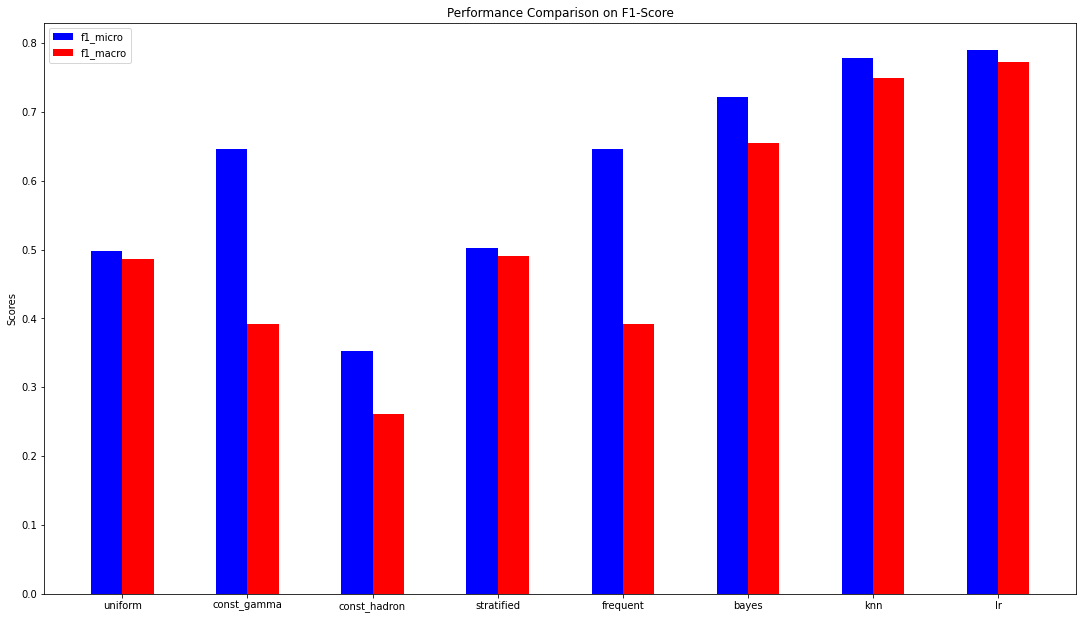

In [ ]:
f1_macros, f1_micros, labels = [],[],[]
for clf in predictions:  
    f1_micros.append(f1_score(y_test,predictions[clf],average='micro'))
    f1_macros.append(f1_score(y_test,predictions[clf],average='macro'))
    labels.append(clf)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, f1_micros, width, label='f1_micro', color = "blue")
rects2 = ax.bar(x + width/2, f1_macros, width, label='f1_macro', color = "red")

fig.set_size_inches(18.5, 10.5)
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison on F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

### Bar plot για τα accuracies

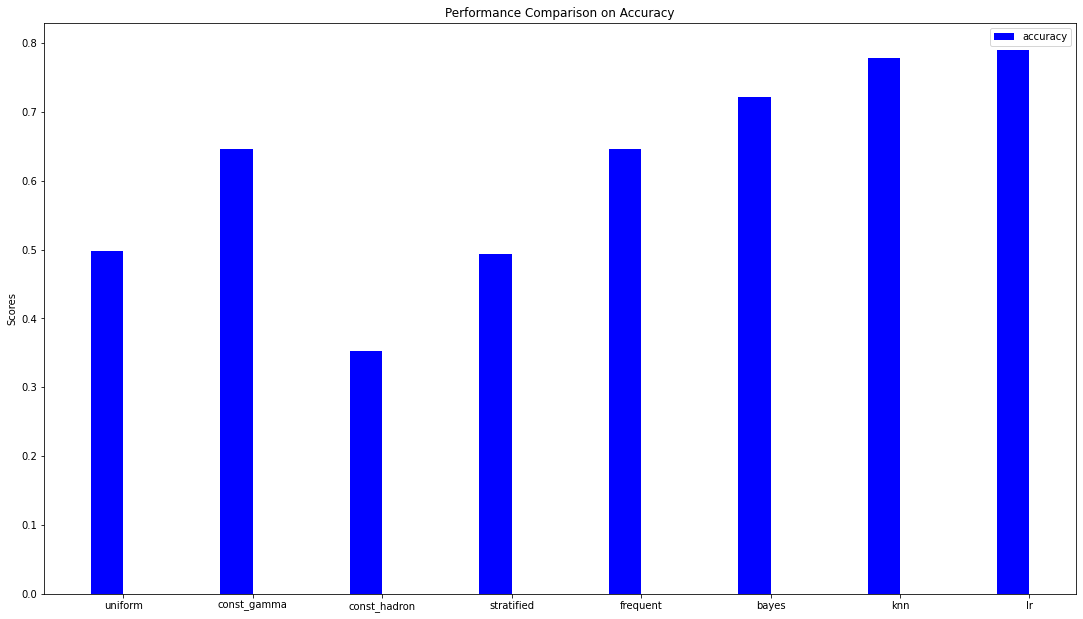

In [ ]:
scores, acc_labels = [],[]
for clf in accuracies:  
    scores.append(accuracies[clf])
    acc_labels.append(clf)

x = np.arange(len(acc_labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, scores, width, label='accuracy', color = "blue")

fig.set_size_inches(18.5, 10.5)
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison on Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(acc_labels)
ax.legend()

plt.show()

### Σχολιασμός


Μεταξύ των dummy ταξινομητών, η καλύτερη στρατηγική είναι να διαλέγουμε πάντοτε την πιο συχνή κλάση (frequent) ή ισοδύναμα σταθερά την κλάση που είναι η πιο συχνή (constant-gamma), αφού το test set δεν είναι ισορροπημένο.

Εαν δοκιμάσουμε πολλά runs, θα παρατηρήσουμε ότι η επιλογή stratified, δηλαδή το να επιλέγουμε τυχαία κλάση διατηρώντας την κατανομή των κλάσεων στο train set, ενώ στη γενική περίπτωση θα έδινε καλύτερα αποτελέσματα από τη random επιλογή, στη προκειμένη, λόγω της ισορροπίας του train dataset, οι δύο μέθοδοι είναι ισοδύναμες.

Ο kNN ταξινομητής δίνει καλύτερο αποτέλεσμα από τους dummy classifiers, αφού βασίζεται σε έναν αλγόριθμο λογικής ανάλυσης των δεδομένων εν αντιθέσει με τους dummy ταξινομητές. Επιπλέον λόγω του μεγάλου μεγέθους του test dataset, το αποτέλεσμα του ταξινομητή είναι αρκετά ικανοποιητικό.

Ο Gaussian Naive Bayes εμφανίζει επίσης βελτιωμένα αποτελέσματα συγκριτικά με τους dummy ταξινομητές, αλλά όχι καλύτερα από τον kNN ταξινομητή. Αυτό οφείλεται στις "αφελείς" παραδοχές του συγκεκριμένου ταξινομήτη, όπως την υπόθεση ότι τα features ακολουθούν κανονική κατανομή και είναι ανεξάρτητα μεταξύ τους.

Τέλος, ο LR εμφανίζει τη καλύτερη επίδοση μεταξύ όλων των ταξινομητών.

## Βελτιστοποίηση


Τώρα θα τρέξουμε τους ταξινομητές μετά από βελτιστοποιήσεις που θα κάνουμε.
Αρχικά τονίζουμε πως δεν έχει νόημα να κάνουμε βελτιστοποίηση στον Gaussian Naive Bayes και στους Dummy Classifiers, αφού δεν επηρεάζονται από το pre-processing που θα ακολουθήσουμε, γιατί δεν έχουν παραμέτρους για βελτιστοποίηση.

### Pre-processing
Αρχικοποιούμε τους εκτιμητές:

In [ ]:
selector = VarianceThreshold()
minmax = MinMaxScaler()
pca = PCA()

Η διαδικασία εύρεσης των βέλτιστων υπερπαραμέτρων είναι χρονοβόρα και επαναληπτική διαδικασία πειραματισμών. Γι'αυτό λόγω του μεγάλου μεγέθους του dataset, αρκεί να χρησιμοποιήσουμε μόνο ένα υποσύνολο των διαθέσιμων δειγμάτων αφού τα ανακατέψουμε:

In [ ]:
x_train_copy = x_train
y_train_copy = y_train
x_test_copy  = x_test
y_test_copy  = y_test

x_train_sample, y_train_sample = shuffle(x_train, y_train, random_state=3)
x_train_sample = x_train_sample[0:2000,:]
y_train_sample = y_train_sample[0:2000]

Μπορούμε τώρα να προχωρήσουμε στην εύρεση των βέλτιστων παραμέτρων των μοντέλων μας. Θα εξετάσουμε χωριστά τις παραμέτρους των ταξινομητών kΝΝ και Logistic Regression. Επίσης, επιλέγουμε να μην κάνουμε feature selection καθώς ο αριθμός των features είναι ήδη αρκετά μικρός σε σύγκριση με την ποσότητα των δεδομένων.

In [ ]:
fit_times, pred_times, new_predictions, new_accuracies = {}, {}, {}, {}

for strategy in predictions:
  new_predictions[strategy] = predictions[strategy]
for strategy in accuracies:
  new_accuracies[strategy] = accuracies[strategy]

### kΝΝ


In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)

n_components = np.arange(1,11)
k = np.arange(1,50,5)
knn_weights = ['uniform','distance']
knn_metrics = ['euclidean','manhattan','chebyshev']

*kNN pipelines*

In [ ]:
pipe = Pipeline(steps=[('scaler', minmax),('selector', selector),('pca', pca),('kNN', knn)])
knn_estimator = GridSearchCV(pipe, dict(pca__n_components = n_components,
                                        kNN__n_neighbors = k,
                                        kNN__weights = knn_weights,
                                        kNN__metric = knn_metrics), cv=10, scoring='f1_macro', n_jobs=-1,verbose=1)

start_time = time.time()
knn_estimator.fit(x_train_sample, y_train_sample)
knn_estimator.predict(x_test)
print("Overall fit and predict time: %s seconds" % (time.time()-start_time))
print("Best parameters",knn_estimator.best_params_)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
Overall fit and predict time: 371.98040866851807 seconds
Best parameters {'kNN__metric': 'manhattan', 'kNN__n_neighbors': 6, 'kNN__weights': 'distance', 'pca__n_components': 10}


Έχοντας εξάγει παραμέτρους για ένα μικρό δείγμα του train set, επαναλαμβάνουμε την διαδικασία για όλο το dataset με πολύ μικρότερο εύρος παραμέτρων, για μεγάλη ακρίβεια.

In [ ]:
n_components = np.arange(9,11) # best pca_n parameter is 10 as shown above
k = np.arange(3,9) #best k parameter is 6 as shown above
knn_weights = ['distance']
knn_metrics = ['manhattan']


pipe = Pipeline(steps=[('scaler', minmax),('selector', selector),('pca', pca),('kNN', knn)])
knn_estimator = GridSearchCV(pipe, dict(pca__n_components = n_components,
                                        kNN__n_neighbors = k,
                                        kNN__weights = knn_weights,
                                        kNN__metric = knn_metrics), cv=10, scoring='f1_macro', n_jobs=-1,verbose=1)

start_time = time.time()
knn_estimator.fit(x_train, y_train)
knn_estimator.predict(x_test)
print("Overall fit and predict time: %s seconds" % (time.time()-start_time))
print("Best parameters",knn_estimator.best_params_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Overall fit and predict time: 24.6235613822937 seconds
Best parameters {'kNN__metric': 'manhattan', 'kNN__n_neighbors': 8, 'kNN__weights': 'distance', 'pca__n_components': 10}


Με τις βέλτιστες παραμέτρους, εκπαιδεύουμε το train set με kNN ταξινομητή.

In [ ]:
x_train_copy = minmax.fit_transform(x_train)
x_test_copy = minmax.fit_transform(x_test)

pca_complete = PCA(knn_estimator.best_params_['pca__n_components'])

x_train_copy = pca_complete.fit_transform(x_train_copy)
x_test_copy = pca_complete.fit_transform(x_test_copy)

knn = KNeighborsClassifier(n_neighbors=knn_estimator.best_params_['kNN__n_neighbors'],
                           weights=knn_estimator.best_params_['kNN__weights'],
                           metric=knn_estimator.best_params_['kNN__metric'])

start_time = time.time()
knn.fit(x_train_copy,y_train_copy)
fit_times['knn'] = time.time() - start_time

start_time = time.time()
new_predictions['knn'] = knn.predict(x_test_copy)
pred_times['knn'] = time.time() - start_time

new_accuracies['knn'] = knn.score(x_test_copy,y_test)


print(f'Confusion Matrices of the kNN Classifier:\n {confusion_matrix(y_test, new_predictions["knn"])}')

print("\n")
print("Accuracy of the kNN Classifier:")
print(f'{new_accuracies["knn"]}')

print("\n")
print("\nClassification Report of k-NN:\n", classification_report(y_test,new_predictions['knn']))

Confusion Matrices of the kNN Classifier:
 [[3021  668]
 [ 484 1533]]


Accuracy of the kNN Classifier:
0.7981072555205048



Classification Report of k-NN:
               precision    recall  f1-score   support

           g       0.86      0.82      0.84      3689
           h       0.70      0.76      0.73      2017

    accuracy                           0.80      5706
   macro avg       0.78      0.79      0.78      5706
weighted avg       0.80      0.80      0.80      5706



### Logistic Regression

In [ ]:
lr = LogisticRegression()

params = [{'lr__penalty': ['l1'], 'lr__C': [0.01, 0.1, 1, 10, 100], 'lr__solver': ['liblinear', 'saga'], 'pca__n_components' : np.arange(1,11)},
          {'lr__penalty': ['l2'], 'lr__C': [0.01, 0.1, 1, 10, 100], 'lr__solver': ['sag', 'liblinear', 'newton-cg', 'lbfgs', 'saga'], 'pca__n_components' : np.arange(1,11)}, 
          {'lr__penalty': ['l1', 'l2'], 'lr__C': [0.01, 0.1, 1, 10, 100], 'lr__solver': ['liblinear', 'saga'], 'pca__n_components' : np.arange(1,11)},
          {'lr__penalty': ['l1','l2', 'elasticnet', 'none'], 'lr__C': [0.01, 0.1, 1, 10, 100], 'lr__l1_ratio': [0, 0.5, 1], 'lr__solver': ['saga'], 'pca__n_components' : np.arange(1,11)},
          {'lr__penalty': ['l2', 'none'], 'lr__C': [0.01, 0.1, 1, 10, 100], 'lr__solver': ['sag', 'newton-cg', 'lbfgs', 'saga'], 'pca__n_components' : np.arange(1,11)},
          {'lr__penalty': ['l1', 'none'], 'lr__C': [0.01, 0.1, 1, 10, 100], 'lr__solver': ['saga'], 'pca__n_components' : np.arange(1,11)},
          {'lr__penalty': ['none'], 'lr__C': [0.01, 0.1, 1, 10, 100], 'lr__solver': ['sag', 'newton-cg', 'lbfgs', 'saga'], 'pca__n_components' : np.arange(1,11)}]


*LR Pipelines*

In [ ]:
pipe = Pipeline(steps=[('scaler', minmax),('selector', selector),('pca', pca),('lr', lr)])
lr_estimator = GridSearchCV(pipe, params, cv=10, scoring='f1_macro', n_jobs=-1,verbose=1)

start_time = time.time()
lr_estimator.fit(x_train_sample, y_train_sample)
lr_estimator.predict(x_test)
print("Overall fit and predict time: %s seconds" % (time.time()-start_time))
print("Best parameters",lr_estimator.best_params_)

Fitting 10 folds for each of 1850 candidates, totalling 18500 fits
Overall fit and predict time: 300.6483087539673 seconds
Best parameters {'lr__C': 1, 'lr__penalty': 'l1', 'lr__solver': 'saga', 'pca__n_components': 10}


Επαναλαμβάνουμε την διαδικασία για όλο το dataset:

In [ ]:
params = [{'lr__penalty': ['l1'], 'lr__C': [0.1, 1, 10], 'lr__solver': ['saga'], 'pca__n_components' : np.arange(8,11)}] #we choose the best parameters

pipe = Pipeline(steps=[('scaler', minmax),('selector', selector),('pca', pca),('lr', lr)])
lr_estimator = GridSearchCV(pipe, params, cv=10, scoring='f1_macro', n_jobs=-1,verbose=1)

start_time = time.time()
lr_estimator.fit(x_train, y_train)
lr_estimator.predict(x_test)
print("Overall fit and predict time: %s seconds" % (time.time()-start_time))
print("Best parameters",lr_estimator.best_params_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Overall fit and predict time: 15.058523416519165 seconds
Best parameters {'lr__C': 10, 'lr__penalty': 'l1', 'lr__solver': 'saga', 'pca__n_components': 10}


Εκπαιδεύομε το train set με τον LR ταξινομητή

In [ ]:
x_train_copy = minmax.fit_transform(x_train)
x_test_copy = minmax.fit_transform(x_test)

pca_complete = PCA(lr_estimator.best_params_['pca__n_components'])

x_train_copy = pca_complete.fit_transform(x_train_copy)
x_test_copy = pca_complete.fit_transform(x_test_copy)

logreg = LogisticRegression(C=lr_estimator.best_params_['lr__C'],
                        penalty=lr_estimator.best_params_['lr__penalty'],
                        solver=lr_estimator.best_params_['lr__solver'],
                        max_iter=500, tol=1e5)

start_time = time.time()
logreg.fit(x_train_copy,y_train_copy)
fit_times['lr'] = time.time() - start_time

start_time = time.time()
new_predictions['lr'] = logreg.predict(x_test_copy)
pred_times['lr'] = time.time() - start_time

new_accuracies['lr'] = logreg.score(x_test_copy,y_test)


print(f'Confusion Matrices of the lr Classifier:\n {confusion_matrix(y_test, new_predictions["lr"])}')

print("\n")
print("Accuracy of the lr Classifier:")
print(f'{new_accuracies["lr"]}')

print("\n")
print("Classification Report of lr:\n", classification_report(y_test,new_predictions['lr']))

Confusion Matrices of the lr Classifier:
 [[2971  718]
 [ 521 1496]]


Accuracy of the lr Classifier:
0.7828601472134595


Classification Report of lr:
               precision    recall  f1-score   support

           g       0.85      0.81      0.83      3689
           h       0.68      0.74      0.71      2017

    accuracy                           0.78      5706
   macro avg       0.76      0.77      0.77      5706
weighted avg       0.79      0.78      0.78      5706



## Αποτελέσματα και συμπεράσματα

### Markdown πίνακας

Παρουσιάζονται οι out-of-the-box τιμές και η διαφορά με τις νέες (μόνο για τον kNN ταξινομητή και τον LR ταξινομητή) στη στήλη delta.

| Classifier | F1 Score (Micro) | F1 Score (Macro) | Accuracy | Delta_F1 Score (Macro) | Delta_Accuracy |
|:----:|:------:|:-------:|:--------:|:--------:|:--------:|
| **dc_uniform** |0.4924 |0.4797|0.4978|0.0|0.0|
| **dc_const_gamma**|0.6465|0.3926|0.6465|0.0|0.0|
| **dc_const_hadron**|0.3534|0.2611|0.3534|0.0|0.0|
| **dc_stratified**|0.5021|0.4890|0.5108|0.0|0.0|
| **dc_frequent**|0.6465 |0.3926|0.6465|0.0|0.0|
| **gnb**|0.7220|0.6550|0.7220|0.0|0.0|
| **knn**|0.7783|0.7494|0.7783|0.78 - 0.7494 = **0.0306**|0.7981 - 0.7783 = **0.0198**|
| **lr**|0.7895|0.7721|0.7895|0.77 - 0.7721 = **-0.0021**|0.7828 - 0.7895 = **-0.0067**|

### Bar plot για τα F1 scores

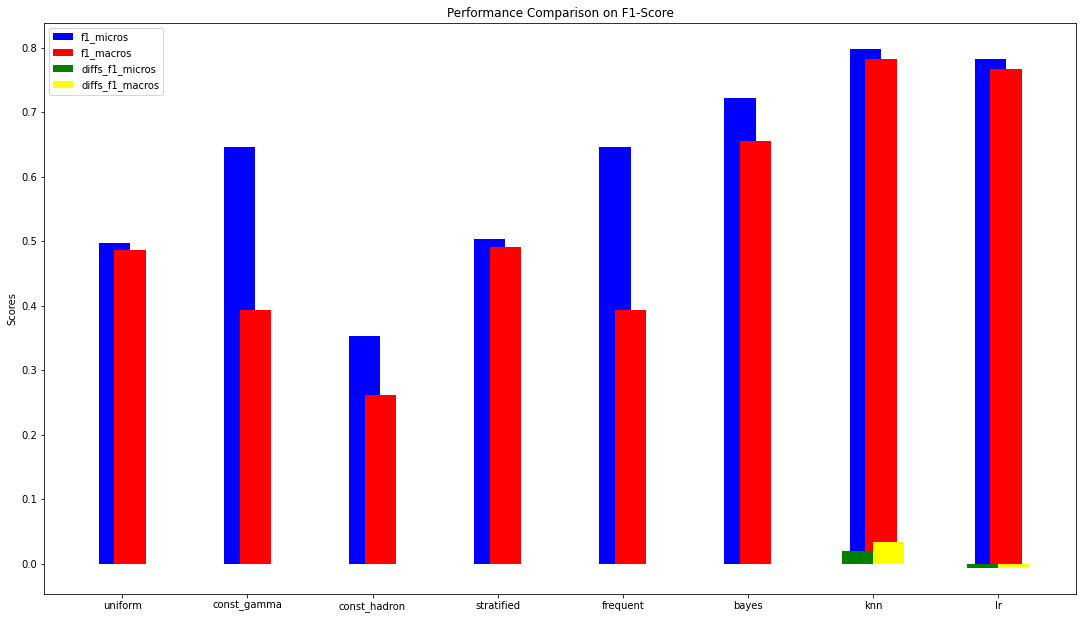

In [ ]:
new_f1_macros, new_f1_micros, new_labels = [],[],[]
for clf in new_predictions:  
    new_f1_micros.append(f1_score(y_test,new_predictions[clf],average='micro'))
    new_f1_macros.append(f1_score(y_test,new_predictions[clf],average='macro'))
    new_labels.append(clf)

x = np.arange(len(new_labels))
width = 0.25

diffs_macros, diffs_micros = [], []
for i in range(len(new_f1_micros)):
  diffs_micros.append(new_f1_micros[i] - f1_micros[i])
  diffs_macros.append(new_f1_macros[i] - f1_macros[i])

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/4, new_f1_micros, width, label='f1_micros', color = "blue")
rects2 = ax.bar(x + width/4, new_f1_macros, width, label='f1_macros', color = "red")
rects3 = ax.bar(x - width/2, diffs_micros, width, label='diffs_f1_micros', color = "green")
rects4 = ax.bar(x + width/2, diffs_macros, width, label='diffs_f1_macros', color = "yellow")

fig.set_size_inches(18.5, 10.5)
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison on F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(new_labels)
ax.legend()

plt.show()

### Bar plot για τα accuracies

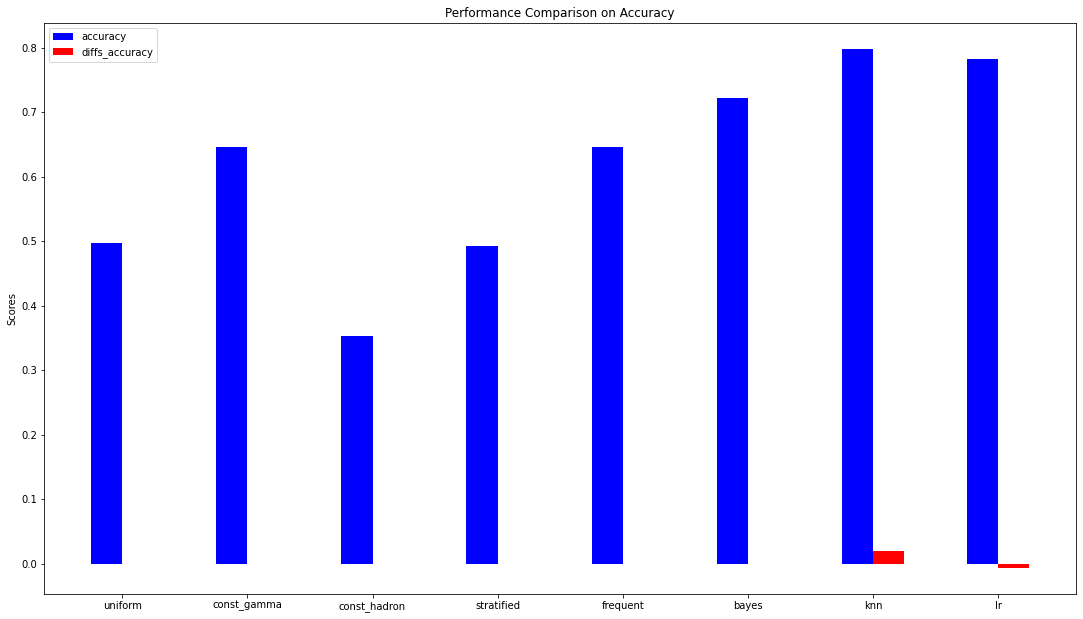

In [ ]:
new_scores, new_acc_labels = [],[]
for clf in accuracies:  
    new_scores.append(new_accuracies[clf])
    new_acc_labels.append(clf)

x = np.arange(len(new_acc_labels))
width = 0.25

diffs_accuracies = []
for i in range(len(new_scores)):
  diffs_accuracies.append(new_scores[i] - scores[i])

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, new_scores, width, label='accuracy', color = "blue")
rects2 = ax.bar(x + width/2, diffs_accuracies, width, label='diffs_accuracy', color = "red")

fig.set_size_inches(18.5, 10.5)
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison on Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(new_acc_labels)
ax.legend()

plt.show()

### Σχολιασμός


Ο καλύτερος ταξινομητής είναι αναμφίβολα ο kNN και ο χειρότερος ο Naive Bayes. Προφανώς αυτό ήταν αναμενόμενο. Η αφελής τακτική του Bayes τον καθιστά ανίκανο να επιλύσει αποδοτικά τα περισσότερα προβλήματα, ενώ ο kNN, είναι ιδανικός για το πρόβλημα αυτό αφού παρουσιάζει πολύ καλή επίδοση.
Τα δεδομένα μας είναι δυαδικά (δυαδικές τιμές για τα labels), ο kNN θα λειτουργήσει σαν μια ευθεία που θα τα διαχωρίσει και με αρκετούς γείτονες k, θα βελτιστοποιηθεί η λύση του προβλήματος.

Ο Linear Regression παρατηρούμε ότι μείωσε ελάχιστα την επίδοσή του παρά τις όλες βελτιστοποιήσεις μας. Αυτό συμβαίνει καθώς η φύση του ταξινομητή είναι ιδιαίτερα ασταθής και δουλεύει ήδη πολύ καλά για το συγκεκριμένο dataset από την out-of-the-box τακτική και οι by default παράμετροι του Linear Regression είναι οριακά ιδανικοί.

Έπειτα για τους πίνακες σύγχυσης:

AxesSubplot(0.125,0.125;0.62x0.755)


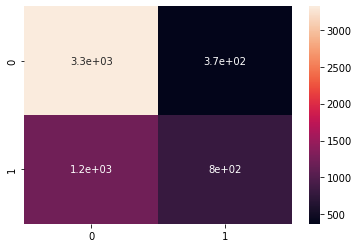

In [ ]:
print(sns.heatmap(confusion_matrix(y_test, new_predictions["bayes"]), annot=True)) #for kNN

AxesSubplot(0.125,0.125;0.62x0.755)


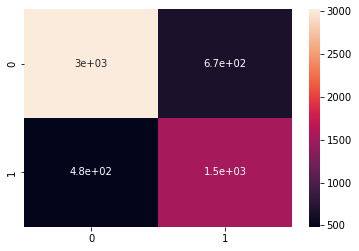

In [ ]:
print(sns.heatmap(confusion_matrix(y_test, new_predictions["knn"]), annot=True)) #for Bayes

AxesSubplot(0.125,0.125;0.62x0.755)


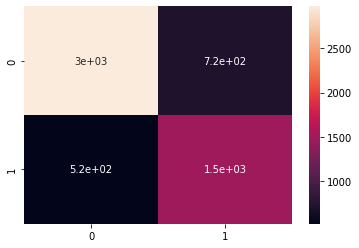

In [ ]:
print(sns.heatmap(confusion_matrix(y_test, new_predictions["lr"]), annot=True)) #for lr

Συμπερασματικά, ο kNN ταξινομητής έχει το υψηλότερο accuracy και f1 score. Ωστόσο, ίσως ο LR θα μπορούσε να αποτελέσει πολύ καλή επιλογή, μιας και έχει υψηλές μετρικές και χωρίς τις βελτιστοποιήσεις και αφού ο kNN έχει μεγάλη πολυπλοκότητα και στην πράξη ίσως να μην είναι ο πιο εύχρηστος.